In [1]:
# local install includes
local_venv = '/udd0/litterbox/venv/bin/activate_this.py'
execfile(local_venv, dict(__file__=local_venv))

In [2]:
%matplotlib inline
import numpy as np
from astropy import units as u
import astropy.coordinates as coords

In [3]:
(Usun, Vsun, Wsun) = (10.3, 15.3, 7.7)

### Simbad
http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=SY+Scl&submit=SIMBAD+search

proper motions: pm-ra pm-dec
* pm-ra : mu-ra*cos(dec) (expressed in the ICRS system in mas/yr)
* pm-dec : mu-dec (expressed in the ICRS system in mas/yr)

radial velocity V(km/s) (Heliocentric frame)

Parallaxes (mas)

### VERA
proper motions: pm-ra pm-dec
* pm-ra : mu-ra*cos(dec) (expressed in the ICRS system in mas/yr) (? I think it is)
* pm-dec : mu-dec (expressed in the ICRS system in mas/yr)

radial velocity V(km/s) (LSR frame)

Parallaxes (mas)

### Gaia
http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ5b308e2285a3&-out.add=.&-source=I/345/gaia2&-c=001.90104160167%20-25.49446409247,eq=ICRS,rs=0.005&-out.orig=o

proper motions: pm-ra pm-dec
* Proper motion in right ascension direction (pmRA*cosDE) (pmra) 
* Proper motion in declination direction (pmdec)

Spectroscopic radial velocity in the solar barycentric reference frame

Parallaxes (mas)

## SY Scl

In [4]:
# All-sky catalog of solar-type dwarfs (Nascimbeni+, 2016)
# http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ5b3cf3e9682c&-out.add=.&-source=J/MNRAS/463/4210/ucac4rpm&recno=9334602

proper_motion = np.array((4.6, -7.8))  # u.mas/u.yr

vr = 24.  # u.km/u.s
l,b = np.deg2rad([39.91, -80.05])
vlsr =  vr + (Usun * np.cos(l) * np.cos(b) + Vsun * np.sin(l) * np.cos(b) + Wsun * np.sin(b))

# Not available, using VERA value
parallax = 0.75 # None  # u.mas

print ('simulate_orbit.py --astro-file config/SYScl.ini --parallax %s --pm %s,%s --vr %.2f --xyz --timeseries -v' %
(parallax, proper_motion[0], proper_motion[1], vr))

proper_motion[0] = proper_motion[0]*np.cos(np.deg2rad(-25.49445226))
print ('simulate_orbit.py --astro-file config/SYScl.ini --parallax %.2f --pm %.2f,%.2f --vlsr %.2f --xyz --timeseries -v' %
(parallax, proper_motion[0], proper_motion[1], vlsr))

simulate_orbit.py --astro-file config/SYScl.ini --parallax 0.75 --pm 4.6,-7.8 --vr 24.00 --xyz --timeseries -v
simulate_orbit.py --astro-file config/SYScl.ini --parallax 0.75 --pm 4.15,-7.80 --vlsr 19.48 --xyz --timeseries -v


In [5]:
# VERA
proper_motion = np.array((6.82, -8.73)) - np.array((0.84, 0.42))  # u.mas/u.yr

parallax = 0.75  # u.mas

# Stellar Maser Observations (Benson+ 1990) 
# http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ5b3cf3e9682c&-out.add=.&-source=V/68A/table1&recno=8
vlsr = 21.  # u.km/u.s

print ('simulate_orbit.py --astro-file config/SYScl.ini --parallax %.2f --pm %.2f,%.2f --vlsr %.2f --xyz --timeseries -v' %
(parallax, proper_motion[0], proper_motion[1], vlsr))

simulate_orbit.py --astro-file config/SYScl.ini --parallax 0.75 --pm 5.98,-9.15 --vlsr 21.00 --xyz --timeseries -v


In [6]:
# SIMBAD values from Gaia
proper_motion = (6.111, -7.475)  # u.mas/u.yr
parallax = 0.6751  # u.mas
Vr = 23.  # u.km/u.s (??)

l,b = np.deg2rad([39.91, -80.05])
vlsr =  Vr + (Usun * np.cos(l) * np.cos(b) + Vsun * np.sin(l) * np.cos(b) + Wsun * np.sin(b))

print ('simulate_orbit.py --astro-file config/SYScl.ini --parallax %.2f --pm %.2f,%.2f --vlsr %.2f --xyz --timeseries -v' %
(parallax, proper_motion[0], proper_motion[1], vlsr))

simulate_orbit.py --astro-file config/SYScl.ini --parallax 0.68 --pm 6.11,-7.47 --vlsr 18.48 --xyz --timeseries -v


## Y Lib

In [7]:
# SIMBAD values
# http://simbad.u-strasbg.fr/simbad/sim-id?Ident=V%2A%20Y%20Lib
# Hipparcos
proper_motion = np.array((-5.59, -18.48))  # u.mas/u.yr
parallax = 2.06  # u.mas
Vr = -7.  # u.km/u.s (?? Vlsr ??)

l,b = np.deg2rad([353.82619238, 42.58761187])
vlsr =  Vr + (Usun * np.cos(l) * np.cos(b) + Vsun * np.sin(l) * np.cos(b) + Wsun * np.sin(b))

print ('simulate_orbit.py --astro-file config/YLib.ini --parallax %s --pm %s,%s --vlsr %.2f --xyz --timeseries -v' %
(parallax, proper_motion[0], proper_motion[1], vlsr))

simulate_orbit.py --astro-file config/YLib.ini --parallax 2.06 --pm -5.59,-18.48 --vlsr 4.54 --xyz --timeseries -v


In [8]:
# VERA
print ('simulate_orbit.py --astro-file config/YLib.ini --mwp-file config/MWPotential.ini --xyz --timeseries -v')

simulate_orbit.py --astro-file config/YLib.ini --mwp-file config/MWPotential.ini --xyz --timeseries -v


## Orbit Potentials

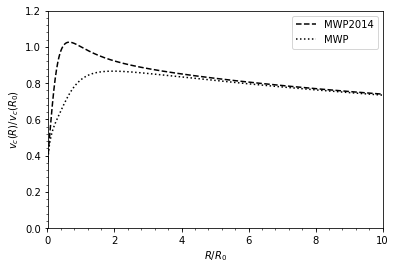

In [9]:
import galpy.potential
import matplotlib.pylab as plt

PSP = galpy.potential.PowerSphericalPotentialwCutoff(alpha=1.8,rc=0.2375,normalize=0.05)
NFWP = galpy.potential.NFWPotential(a=2.0,normalize=.35)

MNP = galpy.potential.MiyamotoNagaiPotential(a=0.375,b=0.035,normalize=.6)
MWP2014 = [PSP, MNP, NFWP]

MNP = galpy.potential.MiyamotoNagaiPotential(a=0.9,b=0.027,normalize=.27)
MWP = [PSP, MNP, NFWP]

from galpy.potential import plotRotcurve
plotRotcurve(MWP2014,
             Rrange=[0.01,10.],
             grid=1001,
             yrange=[0.,1.2],
             color='k',
             linestyle='--',
             label=r'MWP2014')
#              savefilename='mpw2014')
plotRotcurve(MWP,
             Rrange=[0.01,10.],
             grid=1001,
             yrange=[0.,1.2],
             overplot=True,
             color='k',
             linestyle=':',
             label=r'MWP')
#             savefilename='mpw')
plt.legend(loc=0)


0.146198830409
0.166666666667


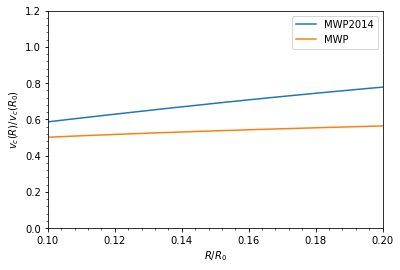

In [10]:
parallax = 0.855 * u.mas # mas = milli-arcseconds
distance = (parallax).to(u.kpc, u.parallax())
print distance.value/8.

parallax = 0.75 * u.mas # mas = milli-arcseconds
distance = (parallax).to(u.kpc, u.parallax())
print distance.value/8.

plotRotcurve(MWP2014,
             Rrange=[0.1,0.2],
             grid=1001,
             yrange=[0.,1.2],
             label=r'MWP2014')
plotRotcurve(MWP,
             Rrange=[0.1,0.2],
             grid=1001,
             yrange=[0.,1.2],
             overplot=True,
             label=r'MWP')
plt.legend(loc=0)